# traycer demo

Rendering pixels: 100%|██████████| 360000/360000 [32:47<00:00, 182.98 pixel/s]


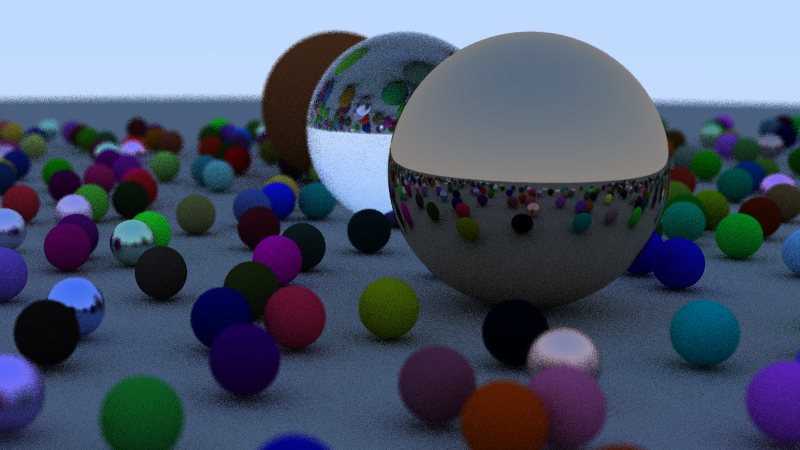

In [2]:
import traycer
from PIL import Image
import numpy as np

# filename
fname = "test.ppm"

# initialize world
world = traycer.hittable_list()

# ground material
ground_material = traycer.lambertian(traycer.color(0.5,0.5,0.5))
world.add(traycer.sphere(traycer.point3(0,-1000,0), 1000, ground_material))

# generate small spheres
for a in range(-11,11,1):
    for b in range(-11,11,1):
        choose_mat = np.random.uniform(0.0,1.0)
        center = traycer.point3(a + 0.9*np.random.uniform(0,1), 0.2, b + 0.9*np.random.uniform(0,1))
                     
        if ((center - traycer.point3(4, 0.2, 0)).length() > 0.9):
            if choose_mat < 0.8:
                # diffuse
                color1 = traycer.color()
                color2 = traycer.color()
                color1.randomize()
                color2.randomize()
                albedo = color1 * color2
                sphere_material = traycer.lambertian(albedo)
            elif choose_mat < 0.95:
                # metal
                albedo = traycer.color()
                albedo.randomize(min_v=0.5, max_v=1.0)
                fuzz = np.random.uniform(0, 0.5)
                sphere_material = traycer.metal(albedo, fuzz)
            else:
                #glass
                sphere_material = traycer.dielectric(1.5)
                
            world.add(traycer.sphere(center, 0.2, sphere_material))

# add three large spheres
material1 = traycer.dielectric(1.5)
world.add(traycer.sphere(traycer.point3(0,1,0), 1.0, material1))
material2 = traycer.lambertian(traycer.color(0.4,0.2,0.1))
world.add(traycer.sphere(traycer.point3(-4,1,0), 1.0, material2))
material3 = traycer.metal(traycer.color(0.7,0.6,0.5))
world.add(traycer.sphere(traycer.point3(4,1,0), 1.0, material3))

# set up camera
cam = traycer.camera(image_width=800, lookfrom=traycer.point3(13,2,3),
                     lookat=traycer.point3(0,0,0), 
                     vup=traycer.vec3(0,1,0), vfov=20, defocus_angle=0.6,
                     focus_dist=10.0)

# render and display
image = cam.render(world, aa=30, max_depth=10)
image.write(fname)
display(Image.open(fname))
